In [80]:
#load necessary library
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numpy import linalg
%matplotlib inline

In [81]:
#generate data 
with open('RedWine_HW7.txt','r') as f:
    features = []
    lines=f.readline()
    featues = lines.split(';')
    for i in range(13):
        features.append(featues[i]) 
r_data = np.genfromtxt('RedWine_HW7.txt',skip_header=1)
w_data = np.genfromtxt('WhiteWine_HW7.txt',skip_header=1)

In [82]:
#scalar data
#for n in range(13):
   # max_r = max(r_data[:,n])
   # min_r = min(r_data[:,n])
   # max_w = max(w_data[:,n])
   # min_w = max(w_data[:,n])
   # r_data[:,n] = (r_data[:,n]-min_r)/max_r
   # w_data[:,n] = (w_data[:,n]-min_w)/max_w

In [83]:
# the first and second row storage the within group variance of each feature 
# the third row storage the between group variance of each feature
operator = np.zeros([3,13])
rdata = r_data
wdata = w_data
for i in range(13):
    # caculate the within group variance  c1=red wine   c2 = white wine
    c1 = np.cov(rdata[:,i])
    c2 = np.cov(wdata[:,i])
    #place the within variance into matrix
    operator[0,i] = c1
    operator[1,i] = c2
    #compute between variance of each feature of wine
    mu0 = (sum(rdata[:,i])+sum(wdata[:,i]))/(4898+1599)
    #print('mu0',mu0)
    s1 = 1599/(1599+4898)*(np.mean(rdata[:,i])-mu0)*(np.mean(rdata[:,i])-mu0)
    #print(np.mean(rdata[:,i]))
    s2 = 4898/(1599+4898)*(np.mean(wdata[:,i])-mu0)*(np.mean(wdata[:,i])-mu0)
    #print((np.mean(wdata[:,i])-mu0)*(np.mean(wdata[:,i])-mu0))
    Sb = s1 + s2
    #print(Sb)
    #storage s1 and s2 into operator
    operator[2,i] = Sb

In [84]:
#use Backward Feature Selection to select the best features
def BFS(covariance_matrix):
    dl = covariance_matrix
    best_list=[]
    dlist = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    cv = dl
    trace_ratio=[]
    ratio=[]
    for n in range(13):
        NumFeatures = n+1
        ratio.clear()
        for m in range(13-n):
            mum = sum(sum(cv[0,[best_list+[dlist[m]]]])+sum(cv[1,[best_list+[dlist[m]]]]))
            child = sum(sum(cv[2,[best_list+[dlist[m]]]]))
            ratio.append(child/mum)
        #print(ratio,n)
        BestValue = max(ratio)
        Position = ratio.index(BestValue)
        best_list.append(dlist[Position])
        np.delete(cv,dlist[Position],1)
        del dlist[Position]
        trace_ratio.append(BestValue)
    return trace_ratio,best_list

#Forward feature selection
def FFS(covariance_matrix):
    dl = covariance_matrix
    cv = dl
    data_list = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    remove_list = []
    trace_ratio = []
    x=[]
    previous_ratio = sum(dl[2,:])/(sum(dl[0,:])+sum(dl[1,:]))
    for n in range(13):
        trace_ratio.clear()
        for i in range(13-n):
            test_list = list(data_list)
            if len(test_list)==1:
                return x
            else:
                del test_list[i]
                mum = sum(sum(cv[0,[test_list]])+sum(cv[1,[test_list]]))
                child = sum(cv[2,[test_list]].T)
                trace_ratio.append(child/mum)
        RemoveValue = max(trace_ratio)
        x.append(RemoveValue)
        position = trace_ratio.index(RemoveValue)
        remove_list.append(data_list[position])
        del data_list[position]
        previous_ratio = trace_ratio[position]
        print(remove_list)
    return x

[6, 7, 4, 1, 9, 8, 2, 12, 11, 10, 0, 3, 5]


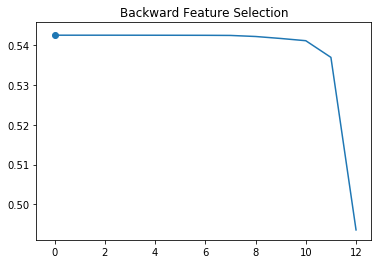

In [85]:
trace,best_list = BFS(operator)
plt.title('Backward Feature Selection')
plt.plot(trace)
plt.scatter(trace.index(max(trace)),max(trace))
print(best_list)

[5]
[5, 3]
[5, 3, 0]
[5, 3, 0, 10]
[5, 3, 0, 10, 11]
[5, 3, 0, 10, 11, 12]
[5, 3, 0, 10, 11, 12, 2]
[5, 3, 0, 10, 11, 12, 2, 8]
[5, 3, 0, 10, 11, 12, 2, 8, 9]
[5, 3, 0, 10, 11, 12, 2, 8, 9, 1]
[5, 3, 0, 10, 11, 12, 2, 8, 9, 1, 4]
[5, 3, 0, 10, 11, 12, 2, 8, 9, 1, 4, 7]


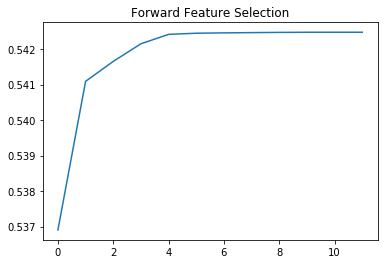

In [86]:
x= FFS(operator)
plt.title('Forward Feature Selection')
plt.plot(x)